# Week 1B: Exploratory Data Science in Python

- Section 401
- 9/6/2023

## Today

- Introduction to Pandas
- Key data analysis concepts
- Example: Census + Zillow data

## Reminder: The weekly workflow

- You'll set up your local Python environment as part of the [first homework assignment](https://github.com/MUSA-550-Fall-2023/assignment-1)
- Each week, you will have two options to follow along with lectures:
    1. Using Binder in the cloud, launching via the button on the week's repository
    1. Download the week's repository to your laptop and launch the notebook locally
- Work on homeworks locally on your laptop — Binder is only a *temporary* environment (no save features)

To follow along today, go to [https://github.com/MUSA-550-Fall-2023/week-1](https://github.com/MUSA-550-Fall-2023/week-1)

![](imgs/binder-buttons-2.png)

::: {.callout-tip title="Reminder: Free DataCamp Courses"}

DataCamp is providing 6 months of complimentary access to its courses for students in MUSA 550. Whether you have experience with Python or not, this is a great opportunity to learn the basics of Python and practice your skills.

It is strongly recommended that you watch some or all of the introductory videos below to build a stronger Python foundation for the semester. The more advanced, intermediate courses are also great — the more the merrier!


For more info, including how to sign up, check out [the resources section of the website](https://musa-550-fall-2023.github.io/resource/python.html#datacamp-courses).

:::

## Python Data Analysis: the *pandas* package

Documentation is available at [https://pandas.pydata.org](https://pandas.pydata.org)

### The old logo
<center>
<img src="imgs/pandas-old-logo.png" width=400></img>
</center>

### The new, less fun logo

<center>
    <img width=500 src="https://raw.githubusercontent.com/pandas-dev/pandas/master/web/pandas/static/img/pandas.svg"></img>
</center>

The following line imports the *pandas* package:

In [68]:
import pandas as pd

## Basic *pandas* concepts

The primary *objects* in *pandas* are the:

  * **`DataFrame`**, which is very similar to an Excel spreadsheet, and has rows and named columns
  * **`Series`**, which represents a single column of data. A `DataFrame` contains one or more `Series` and a name for each `Series`.

The data frame is a commonly used abstraction for data manipulation. Similar implementations exist in `R`.

You can think `Series` objects as fancier versions of Python's built-in list data type.

To create a `Series` object, pass a list of values to the `pd.Series()` function:

In [69]:
## Philadelphia metro counties and populations

county_names = pd.Series(
    [
        "Bucks",
        "Chester",
        "Delaware",
        "Montgomery",
        "Philadelphia",
        "Burlington",
        "Camden",
        "Gloucester",
    ]
)

population = pd.Series([
    645054.0,
    545823.0,
    575182.0,
    864683.0,
    1567258.0,
    466103.0,
    524907.0,
    306601.0,
])

`DataFrame` objects can be created by passing a `dict` mapping `string` column names to their respective `Series`. 

In [70]:
county_df = pd.DataFrame({"County Name": county_names, "Population": population})
county_df

,County Name,Population
0,Bucks,645054.0
1,Chester,545823.0
2,Delaware,575182.0
3,Montgomery,864683.0
4,Philadelphia,1567258.0
5,Burlington,466103.0
6,Camden,524907.0
7,Gloucester,306601.0


::: {.callout-note}

Always try to give your variables *meaningful names*. It will help immensely when you are trying to debug problems or when you're trying to understand the code you've written months later.

:::

### 1. Accessing data

In [71]:
# Access columns with a dict-like syntax
county_df["Population"]

0     645054.0
1     545823.0
2     575182.0
3     864683.0
4    1567258.0
5     466103.0
6     524907.0
7     306601.0
Name: Population, dtype: float64

Rows can be accessed using Python's syntax for slicing:

In [72]:
## Example: slicing a list slicing

# Get the elements with indices 1 and 2 (but NOT 3)
county_list = ["Bucks", "Philadelphia", "Delaware"]

county_list[0:2]  # Same as county_list[:2] (omitting the zero)

['Bucks', 'Philadelphia']

Unfortunately the functionality for slicing lists is not that powerful...but pandas will have many more features!

In [73]:
# Slicing a DataFrame is similar...but now we will get rows of the DataFrame back!

county_df[0:2]

,County Name,Population
0,Bucks,645054.0
1,Chester,545823.0


*pandas* includes functionality for many different ways of selecting data. See [the documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for many more examples. 

### 2. Manipulating data

In [74]:
county_df["Population"].median()

560502.5

In [75]:
county_df["Population"].mean()

686951.375

[NumPy](http://www.numpy.org/) (*Num*erical *Py*thon) is a popular toolkit for scientific computing. Among other things, it can calculate mathematical functions, like mean, median, min, max, etc.

*pandas* `Series` can be used as arguments to most NumPy functions:

In [76]:
import numpy as np

In [77]:
# Calculate the median population value
np.median(county_df["Population"])

560502.5

In [78]:
# Calculate the median population value
np.mean(county_df["Population"])

686951.375

::: {.callout-note title="Note: DataCamp + NumPy"}

We won't go through the specifics of NumPy in detail in this course. You will see it pop up throughout
the course, particularly when we start talking about two-dimensional raster image data. NumPy specializes
in *multi-dimensional arrays*, the same format of multi-band raster data. 

In the meantime, if you want to know more about NumPy or just build your Python knowledge, check out the
[DataCamp course on NumPy](https://www.datacamp.com/courses/introduction-to-numpy). To get free access to DataCamp, see [the instructions](https://musa-550-fall-2023.github.io/resource/python.html#datacamp-courses) on the course website.

:::

### 3. Applying a function

For more complex single-column transformations, you can use `Series.apply`. It accepts a function that is applied to each value in the `Series`.

An `apply` operation allows you to call an arbitrary function to each value in a column. It is a core `pandas` concept and can be very powerful for complex calculations. 

As an example, we can find which counties have a population greater than one million:

In [79]:
# Define our function
def get_large_counties(population):
    return population > 1e6


large_county_sel = county_df["Population"].apply(get_large_counties)

In [80]:
# This is a Series where the value is the returned value from the above function
large_county_sel

0    False
1    False
2    False
3    False
4     True
5    False
6    False
7    False
Name: Population, dtype: bool

In [81]:
# Add the new computed column to our original data frame
county_df["Large Counties"] = large_county_sel


county_df

,County Name,Population,Large Counties
0,Bucks,645054.0,False
1,Chester,545823.0,False
2,Delaware,575182.0,False
3,Montgomery,864683.0,False
4,Philadelphia,1567258.0,True
5,Burlington,466103.0,False
6,Camden,524907.0,False
7,Gloucester,306601.0,False


We could have also used a Python lambda function for our function. These are *inline* functions that start with a special Python keyword `lambda`, followed by the function argument, a colon, and then the contents of the function.

::: {.callout-tip}
See [this DataCamp tutorial](https://www.datacamp.com/tutorial/python-lambda) for more info on lambda functions.
:::

As an example, let's add a small counties column:

In [82]:
small_counties_func = lambda population: population < 1e6

# we can also use lambda (unnamed, inline) functions
county_df["Small Counties"] = county_df["Population"].apply(small_counties_func)

# Print out
county_df

,County Name,Population,Large Counties,Small Counties
0,Bucks,645054.0,False,True
1,Chester,545823.0,False,True
2,Delaware,575182.0,False,True
3,Montgomery,864683.0,False,True
4,Philadelphia,1567258.0,True,False
5,Burlington,466103.0,False,True
6,Camden,524907.0,False,True
7,Gloucester,306601.0,False,True


### 4. Data selection

We can select the "large" counties by passing the boolean values to the `.loc[]` function of a `DataFrame`:

In [83]:
county_df["Large Counties"]

0    False
1    False
2    False
3    False
4     True
5    False
6    False
7    False
Name: Large Counties, dtype: bool

In [84]:
county_df.loc[ county_df["Large Counties"] ]

,County Name,Population,Large Counties,Small Counties
4,Philadelphia,1567258.0,True,False


::: {.callout-note}
Be sure to use square brackets when calling `.loc`. 

`.loc[]` ✓

`.loc()` ✘
:::

*But:* there is a faster, more concise, to achieve this!

In [85]:
county_df["Population"] > 1e6

0    False
1    False
2    False
3    False
4     True
5    False
6    False
7    False
Name: Population, dtype: bool

In [86]:
# We can pass the selection directory the .loc[] —> no need to define a new variable

county_df.loc[county_df["Population"] > 1e6]

,County Name,Population,Large Counties,Small Counties
4,Philadelphia,1567258.0,True,False


**Question:** What about getting rows where "Large Counties" is False?

**Answer:** Use the Python tilde operator to do a logicial *not* operation:

In [87]:
# Reverse the large counties boolean selection
county_df.loc[ ~large_county_sel ]

,County Name,Population,Large Counties,Small Counties
0,Bucks,645054.0,False,True
1,Chester,545823.0,False,True
2,Delaware,575182.0,False,True
3,Montgomery,864683.0,False,True
5,Burlington,466103.0,False,True
6,Camden,524907.0,False,True
7,Gloucester,306601.0,False,True


In [88]:
# or equivalently:
# NOTE: you need to put the whole expression in () and then apply the tilde!

county_df.loc[ ~(county_df["Population"] > 1e6) ]

,County Name,Population,Large Counties,Small Counties
0,Bucks,645054.0,False,True
1,Chester,545823.0,False,True
2,Delaware,575182.0,False,True
3,Montgomery,864683.0,False,True
5,Burlington,466103.0,False,True
6,Camden,524907.0,False,True
7,Gloucester,306601.0,False,True


*Ah!* An even faster way!

We can use the [pandas query function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html). 

The `query()` function will return a subset of your dataframe based on a string version of the boolean expression.

In [89]:
county_df.query("Population < 1e6")

,County Name,Population,Large Counties,Small Counties
0,Bucks,645054.0,False,True
1,Chester,545823.0,False,True
2,Delaware,575182.0,False,True
3,Montgomery,864683.0,False,True
5,Burlington,466103.0,False,True
6,Camden,524907.0,False,True
7,Gloucester,306601.0,False,True


What else can `.loc[]` do? So much!


One of the more common uses is use the DataFrame's index labels to select particular rows. What is the index?

Each row has a label that idenitifes it. By default the label is an integer ranging from 0 (first row) to 1 less than the number of rows (last row). The label is displayed in bold before each row when you look at a DataFrame:

In [90]:
county_df

,County Name,Population,Large Counties,Small Counties
0,Bucks,645054.0,False,True
1,Chester,545823.0,False,True
2,Delaware,575182.0,False,True
3,Montgomery,864683.0,False,True
4,Philadelphia,1567258.0,True,False
5,Burlington,466103.0,False,True
6,Camden,524907.0,False,True
7,Gloucester,306601.0,False,True


We can pass a label to the `.loc[]` function to select a particular row. For example, to get the Philadelphia row, we could use the "4" label:

In [91]:
county_df.loc[4]

County Name       Philadelphia
Population           1567258.0
Large Counties            True
Small Counties           False
Name: 4, dtype: object

Or maybe we want the suburb counties in NJ. In this case, we can pass a list of multiple labels (5, 6, 7)"

In [92]:
nj_suburbs = county_df.loc[ [5, 6, 7] ]

nj_suburbs

,County Name,Population,Large Counties,Small Counties
5,Burlington,466103.0,False,True
6,Camden,524907.0,False,True
7,Gloucester,306601.0,False,True


::: {.callout-important}

Note that this is different than the `.iloc[]` function, which can also be used to select rows from a DataFrame. However, it uses the integer value of the row, regardless of what the labels in the index are. For example, the first row of a dataframe can always be accessed using:

```python
df.iloc[0]
```

<br/>
For more details on the `iloc[]` function, see the documentation on [indexing by position](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-integer).

In the case of the `nj_suburbs` dataframe, we can get the first row, which has a label of "5", using:

In [93]:
nj_suburbs.iloc[0]

County Name       Burlington
Population          466103.0
Large Counties         False
Small Counties          True
Name: 5, dtype: object

We can also reset the index labels so they range from 0 to the length of the dataframe, using the `reset_index()` function. For example

In [94]:
nj_suburbs.reset_index(drop=True)

,County Name,Population,Large Counties,Small Counties
0,Burlington,466103.0,False,True
1,Camden,524907.0,False,True
2,Gloucester,306601.0,False,True


### Need more help?

**How to remember the specifics of all of these functions?**

The documentation is your best friend! [The Pandas user guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html#user-guide)

You can also use the question mark operator in the notebook! 

In [95]:
# Use the question mark
pd.DataFrame.loc?

Type:        property
String form: <property object at 0x12f6f1d50>
Docstring:  
Access a group of rows and columns by label(s) or a boolean array.

``.loc[]`` is primarily label based, but may also be used with a
boolean array.

Allowed inputs are:

- A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
  interpreted as a *label* of the index, and **never** as an
  integer position along the index).
- A list or array of labels, e.g. ``['a', 'b', 'c']``.
- A slice object with labels, e.g. ``'a':'f'``.

  .. warning:: Note that contrary to usual python slices, **both** the
      start and the stop are included

- A boolean array of the same length as the axis being sliced,
  e.g. ``[True, False, True]``.
- An alignable boolean Series. The index of the key will be aligned before
  masking.
- An alignable Index. The Index of the returned selection will be the input.
- A ``callable`` function with one argument (the calling Series or
  DataFrame) and that returns valid output for inde

In [96]:
# Use the question mark
pd.DataFrame.iloc?

Type:        property
String form: <property object at 0x12f6f1080>
Docstring:  
Purely integer-location based indexing for selection by position.

``.iloc[]`` is primarily integer position based (from ``0`` to
``length-1`` of the axis), but may also be used with a boolean
array.

Allowed inputs are:

- An integer, e.g. ``5``.
- A list or array of integers, e.g. ``[4, 3, 0]``.
- A slice object with ints, e.g. ``1:7``.
- A boolean array.
- A ``callable`` function with one argument (the calling Series or
  DataFrame) and that returns valid output for indexing (one of the above).
  This is useful in method chains, when you don't have a reference to the
  calling object, but would like to base your selection on some value.
- A tuple of row and column indexes. The tuple elements consist of one of the
  above inputs, e.g. ``(0, 1)``.

``.iloc`` will raise ``IndexError`` if a requested indexer is
out-of-bounds, except *slice* indexers which allow out-of-bounds
indexing (this conforms with pyt

## A more interesting example: The Donut Effect

The pandemic and growth in work from home led to a phenomenon known as [the "Donut Effect"](https://www.gsb.stanford.edu/faculty-research/publications/donut-effect-how-covid-19-shapes-real-estate). With more flexible working options and pandemic-driven density fears, people left urban dense cores and opted for more space in city suburbs, driving home and rental prices up in the suburbs relative to city centers. 


### 1. Population change

I've stored more data on population for Philadelphia and its suburbs in a comma-separated value (CSV) file in the data folder: [data/phila-metro-counties-population.csv](./data/phila-metro-counties-population.csv).

This data comes from the [Census Population Estimates series](https://www.census.gov/programs-surveys/popest.html) for counties in the Philadelphia metropolitan region, which includes Philadelphia County, four suburb counties in PA, and 3 suburb counties in NJ. Later in the course, you'll learn how to download data from the Census directly using Python, but for now, I've downloaded and formatted the data already.

Let's use this data to see if the donut effect occurred in Philadelphia and its suburbs. 

**Goal:** Calculate the percent population change from 2020 to 2022 in Philadelphia and the *total* percent change in the suburb counties and compare!



First, use the `pd.read_csv()` function from *pandas*. The first argument to `pd.read_csv()` is the file path to load.

In [97]:
# Load the data from the CSV file
pop_df = pd.read_csv("./data/phila-metro-counties-population.csv")

In [98]:
# How many rows are in the dataframe? --> use the len() operator
len(pop_df)

8

Peak at the first 5 rows:

In [99]:
pop_df.head(n=5)

,county_name,state_name,pop_2020,pop_2022
0,Bucks,PA,646112.0,645054.0
1,Chester,PA,534783.0,545823.0
2,Delaware,PA,576323.0,575182.0
3,Montgomery,PA,856938.0,864683.0
4,Philadelphia,PA,1600600.0,1567258.0


#### Exercise: Calculate the percent change in population for Philadelphia


Let's select the data for Philadelphia to get its population change.

Steps:

1. Select the data for Philadelphia
1. Select the 2020 and 2022 population columns (see the tip below about the `squeeze()` function)
1. Calculate the percent change

::: {.callout-tip title="Tip: The squeeze() function"}

If we select the data for Philadelphia, it will be DataFrame with only a single row. So if we access a column, it will return a Series of length one, rather than just a number.

We can use the `.squeeze()` function to get rid of this extra dimension of length one. It does just one it sounds like: if you have a DataFrame with only one row, it will "squeeze" the row dimension by removing it, returning just a Series object:

:::

**A note about string formatting in Python**

We can format this into a string using an "f-string", strings that have an "f" before them. 

Look for curly braces in these strings. The syntax is: `{variable_name : format string}`. For example:

In [104]:
print(f"Philadelphia's percent change in population from 2020 to 2022: {philly_pop_change:.1f}%")

Philadelphia's percent change in population from 2020 to 2022: -2.1%


In this case, we told Python to format the `philly_pop_change` as a floating point number with one decimal using `.1f`.

::: {.callout-tip}
For more practice with f-strings, see [this DataCamp tutorial](https://www.datacamp.com/tutorial/f-string-formatting-in-python).
:::

**Next up**: let's calculate the total population change across all the suburb counties. First select every county except for Philadelphia, using the `!=` (not equals) operator.

In [105]:
# Now do the selection!
suburb_pop = pop_df.loc[ pop_df["county_name"] != 'Philadelphia' ]  # select the valid rows

suburb_pop

,county_name,state_name,pop_2020,pop_2022
0,Bucks,PA,646112.0,645054.0
1,Chester,PA,534783.0,545823.0
2,Delaware,PA,576323.0,575182.0
3,Montgomery,PA,856938.0,864683.0
5,Burlington,NJ,461648.0,466103.0
6,Camden,NJ,523074.0,524907.0
7,Gloucester,NJ,302554.0,306601.0


To calculate the *total* percent change, we can sum up the population in 2020 and 2022 and calculate the percent change.

In this case, we can use the built-in `.sum()` function for a column Series to sum up the values in a column:

In [106]:
suburb_pop_change = 100 * (suburb_pop["pop_2022"].sum() / suburb_pop["pop_2020"].sum() - 1)

suburb_pop_change

0.6900286869026662

In [107]:
print(f"Percent change in population from 2020 to 2022 in the Philadelphia suburbs: {suburb_pop_change:.1f}%")

Percent change in population from 2020 to 2022 in the Philadelphia suburbs: 0.7%


**Takeaway**

A slight 0.7% increase in population change in the suburb counties from 2020 to 2022, compared to a 2.1% decline in Philadelphia.

This tracks with the idea of a "donut effect" in Philadelphia during the pandemic!

### 2. Home & rental prices

Let's investigate changes in home and rental prices in Philadelphia and its suburbs during the pandemic. If there was a strong "donut effect", we would expect to see higher price appreciation in the suburbs compared to Philadelphia itself.

For this part, we will use [Zillow data](https://www.zillow.com/research/data/), specifically data by county for the Zillow Observed Rent Index (ZORI) and Zillow Home Value Index (ZHVI). 

I've already downloaded the data and stored it in the `data/` folder. Let's read it into pandas using the `pd.read_csv()` function.

In [108]:
zhvi = pd.read_csv("data/County_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
zori = pd.read_csv("data/County_zori_sm_month.csv")

Peek at the first few rows of the rent data:

In [109]:
zori.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,2015-01-31,...,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31
0,3101,0,Los Angeles County,county,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",6,37,1859.636263,...,2884.685434,2878.934549,2875.026052,2871.083085,2877.814065,2884.805738,2898.603156,2902.637331,2911.922927,2918.754134
1,139,1,Cook County,county,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",17,31,1509.519799,...,1953.033934,1948.209459,1951.135298,1957.004902,1971.312435,1985.335169,2003.414964,2029.555166,2052.142638,2065.170019
2,1090,2,Harris County,county,TX,TX,"Houston-The Woodlands-Sugar Land, TX",48,201,1244.972009,...,1605.890305,1604.357134,1603.265557,1612.486921,1618.611045,1628.098030,1630.157224,1638.558882,1648.540280,1655.318245
3,2402,3,Maricopa County,county,AZ,AZ,"Phoenix-Mesa-Chandler, AZ",4,13,1001.214534,...,1937.026071,1927.513924,1918.344571,1913.116142,1917.415652,1930.233484,1939.647281,1945.676380,1945.808056,1948.880852
4,2841,4,San Diego County,county,CA,CA,"San Diego-Chula Vista-Carlsbad, CA",6,73,1797.996849,...,3094.460551,3074.724631,3061.535358,3052.480138,3057.236678,3079.509599,3115.522418,3154.972888,3185.039118,3205.105049


And do the same for the home price data:

In [110]:
zhvi.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,2000-01-31,...,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31
0,3101,0,Los Angeles County,county,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",6,37,205982.244116,...,841135.925058,838631.538883,835366.307179,828060.815041,818172.457895,809992.297565,806193.000835,808305.144458,815021.466146,826958.461096
1,139,1,Cook County,county,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",17,31,136354.916313,...,284950.857552,284143.669431,283375.276172,284008.891628,284769.843988,286109.760510,286873.595748,287996.202478,290010.594940,292281.611623
2,1090,2,Harris County,county,TX,TX,"Houston-The Woodlands-Sugar Land, TX",48,201,107050.239739,...,283073.624205,282597.185986,281442.805088,279727.962356,278170.043854,277582.191393,277509.897059,277852.705574,278500.865874,279400.674485
3,2402,3,Maricopa County,county,AZ,AZ,"Phoenix-Mesa-Chandler, AZ",4,13,146824.674809,...,478373.220270,472003.290822,465224.903046,459750.984210,455757.981512,454203.508557,453192.923509,453262.846630,454625.973499,457065.330187
4,2841,4,San Diego County,county,CA,CA,"San Diego-Chula Vista-Carlsbad, CA",6,73,217214.415906,...,881918.327354,873416.861727,866066.237738,858962.865592,854294.612077,853873.557956,856932.860092,862757.750601,871180.725221,881746.559143


#### Convert from "wide" to "tidy" format

Currently, our data is in **wide** format: each observation has its own column. This usually results in many columns but few rows.


Usually it's better to have data in [**tidy**](https://en.wikipedia.org/wiki/Tidy_data) (also known as **long**) format. Tidy datasets are arranged such that each variable is a column and each observation is a row.

In our case, we want to have a column called `ZORI` and one called `ZHVI` and a row for each month that the indices were measured. 

*pandas* provides the `melt()` function for converting from **wide** formats to **tidy** formats. `melt()` **doesn’t** aggregate or summarize the data. It transforms it into a different shape, but it contains the exact same information as before.

Imagine you have 6 rows of data (each row is a unique county) with 10 columns of home values (each column is a different month). That is wide data and is the format usually seen in spreadsheets or tables in a report.

If you `melt()` that wide data, you would get a table with 60 rows and 3 columns. Each row would contain the county name, the month, and the home value that county and month. This tidy-formatted data contains the same info as the wide data, but in a different form.

**This animation shows the transformation from wide to long / long to wide. You can ignore gather() and spread() - those are the R versions of the pandas functions.**

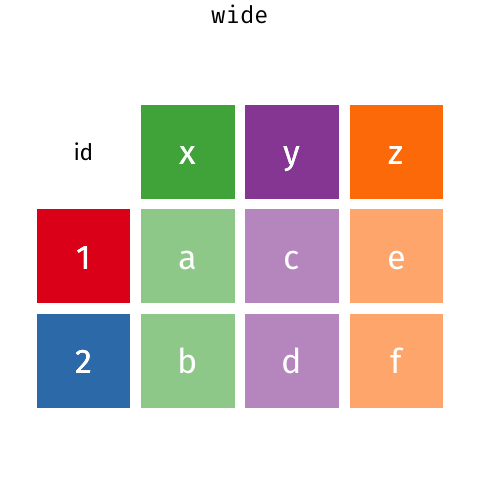



The syntax for `pd.melt()`:

- "id_vars": A list of column names that are the identifier variables, the fields that uniquely identify each observation.
- "value_vars": A list of column names that get "unpivoted" and become the values in the new dataframe.
- "value_name": The name to use for the new value column created; by default, this is "value"
- "var_name": The name of the column that holds the unpivoted column names (the "key" above); by default, this is "variable"

Now let's look at our dataframes.


For "id_vars", we want to use 'RegionName' (county name) and 'StateName'. That uniquely identifies each row. 

**But what about "value_vars"?**

The columns holding the values we want to unpivot are the monthly date strings. So...we need to figure out how to select all of the column names that look like dates.

In [111]:
zhvi.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'StateCodeFIPS', 'MunicipalCodeFIPS', '2000-01-31',
       ...
       '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31', '2023-02-28',
       '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31'],
      dtype='object', length=292)

The `filter()` function to the rescue!

This function will take a function that returns `True`/`False` and list of values and return a new list with values that only return True in the function.


::: {.callout-tip}

See [this tutorial](https://realpython.com/python-filter-function/) for more info on the built-in filter() function.
:::

In our case, let's write a function that tests if a string column name starts with '20' — this should give us all of the column names that look like dates.

In [112]:
def looks_like_a_date(col):
    """A function that tests if a string starts with '20'"""
    
    return col.startswith("20")

In [113]:
looks_like_a_date('2000-01-31')

True

In [114]:
## Now do the filter:
## First argument is the function
## Second argument is the list of values we want to filter

filter(looks_like_a_date, zhvi.columns)

*Ugh*, this doesn't look like what we wanted! 

This is what's called an "iterable" in Python (something that is ready to be iterated over). In order to actually get the values, we need to explicitly pass this to a `list()` function. 

In [115]:
list(filter(looks_like_a_date, zhvi.columns))

['2000-01-31',
 '2000-02-29',
 '2000-03-31',
 '2000-04-30',
 '2000-05-31',
 '2000-06-30',
 '2000-07-31',
 '2000-08-31',
 '2000-09-30',
 '2000-10-31',
 '2000-11-30',
 '2000-12-31',
 '2001-01-31',
 '2001-02-28',
 '2001-03-31',
 '2001-04-30',
 '2001-05-31',
 '2001-06-30',
 '2001-07-31',
 '2001-08-31',
 '2001-09-30',
 '2001-10-31',
 '2001-11-30',
 '2001-12-31',
 '2002-01-31',
 '2002-02-28',
 '2002-03-31',
 '2002-04-30',
 '2002-05-31',
 '2002-06-30',
 '2002-07-31',
 '2002-08-31',
 '2002-09-30',
 '2002-10-31',
 '2002-11-30',
 '2002-12-31',
 '2003-01-31',
 '2003-02-28',
 '2003-03-31',
 '2003-04-30',
 '2003-05-31',
 '2003-06-30',
 '2003-07-31',
 '2003-08-31',
 '2003-09-30',
 '2003-10-31',
 '2003-11-30',
 '2003-12-31',
 '2004-01-31',
 '2004-02-29',
 '2004-03-31',
 '2004-04-30',
 '2004-05-31',
 '2004-06-30',
 '2004-07-31',
 '2004-08-31',
 '2004-09-30',
 '2004-10-31',
 '2004-11-30',
 '2004-12-31',
 '2005-01-31',
 '2005-02-28',
 '2005-03-31',
 '2005-04-30',
 '2005-05-31',
 '2005-06-30',
 '2005-07-

*Hooray, it worked!*

Now, it's time to *melt* our datasets:

In [116]:
zhvi_tidy = zhvi.melt(
    id_vars=["RegionName", "StateName"],
    value_vars=list(filter(looks_like_a_date, zhvi.columns)), # Notice I'm filtering zhvi columns here
    var_name="Date",
    value_name="ZHVI",
)

In [117]:
zori_tidy = zori.melt(
    id_vars=["RegionName", "StateName"],
    value_vars=list(filter(looks_like_a_date, zori.columns)), # Notice I'm filtering zori columns here
    var_name="Date",
    value_name="ZORI",
)

and take a look:

In [118]:
zori_tidy.head()

,RegionName,StateName,Date,ZORI
0,Los Angeles County,CA,2015-01-31,1859.636263
1,Cook County,IL,2015-01-31,1509.519799
2,Harris County,TX,2015-01-31,1244.972009
3,Maricopa County,AZ,2015-01-31,1001.214534
4,San Diego County,CA,2015-01-31,1797.996849


In [119]:
zhvi_tidy.head()

,RegionName,StateName,Date,ZHVI
0,Los Angeles County,CA,2000-01-31,205982.244116
1,Cook County,IL,2000-01-31,136354.916313
2,Harris County,TX,2000-01-31,107050.239739
3,Maricopa County,AZ,2000-01-31,146824.674809
4,San Diego County,CA,2000-01-31,217214.415906


#### Merge the data frames

Another common operation is **merging**, also known as **joining**, two datasets. 

We can use the `merge()` function to merge observations that have the same `Date`, `RegionName`, and `StateName` values.

In [120]:
# Left dataframe is ZORI
# Right dataframe is ZHVI

zillow_data = pd.merge(
    zori_tidy, zhvi_tidy, on=["Date", "RegionName", "StateName"], how="outer"
)

In [121]:
# Let's sort the data by Date
zillow_data = zillow_data.sort_values(
    by="Date",         # Sort by Data column
    ascending=True,    # Ascending order
    ignore_index=True, # Reset the index to 0 to N
)

Let's take a peak at the end of the dataframe using the `.tail()` function:

In [122]:
zillow_data.head(n=20)

,RegionName,StateName,Date,ZORI,ZHVI
0,Dooly County,GA,2000-01-31,NaN,43205.386681
1,Moniteau County,MO,2000-01-31,NaN,NaN
2,Jefferson County,GA,2000-01-31,NaN,52304.968485
3,Henry County,KY,2000-01-31,NaN,83564.841863
4,Pawnee County,OK,2000-01-31,NaN,37124.230106
5,Clarke County,MS,2000-01-31,NaN,NaN
6,Floyd County,IA,2000-01-31,NaN,65476.850601
7,Nottoway County,VA,2000-01-31,NaN,NaN
8,Dewitt County,IL,2000-01-31,NaN,NaN
9,Grand County,CO,2000-01-31,NaN,176407.811425


Merging is very powerful and the merge can be done in a number of ways. In this case, we did a **outer merge** in order to keep all parts of each dataframe: even if a county doesn't have both a ZORI and ZHVI value, the row will be in the merged dataframe with NaN to represent missing values.

By contrast, the **inner merge** only keeps the overlapping intersection of the merge: counties must have *both* a ZORI and ZHVI value for a given month for the row to make it into the merged dataframe.

The below infographic is helpful for figuring out the differences between merge types:

![](./joining_infographic.jpg){width=800}

#### Trim to the counties we want

When we select the counties in the Philly metro region, we need to be careful because if we select just based on county name, we run the risk of selecting counties with the same name in other states. So let's do our selection in two parts:

1. Trim to counties in NJ or PA
1. Trim based on county name

In [123]:
# Get the rows with state == 'PA' or state == 'NJ'
in_nj_pa = zillow_data["StateName"].isin(["PA", "NJ"])

# Save the trimmed dataframe
zillow_trim_tmp = zillow_data.loc[in_nj_pa]

In [124]:
county_names = [
    "Bucks County",
    "Chester County",
    "Delaware County",
    "Montgomery County",
    "Burlington County",
    "Camden County",
    "Gloucester County",
    "Philadelphia County",
]

# Trim based on county name
county_sel = zillow_data['RegionName'].isin(county_names)

# Trim temp dataframe from last step
prices_philly_metro = zillow_trim_tmp.loc[county_sel].copy()

In [125]:
prices_philly_metro

,RegionName,StateName,Date,ZORI,ZHVI
1939,Camden County,NJ,2000-01-31,NaN,104472.922223
1946,Chester County,PA,2000-01-31,NaN,181113.160285
1948,Delaware County,PA,2000-01-31,NaN,113558.833735
1960,Bucks County,PA,2000-01-31,NaN,166888.007583
2008,Burlington County,NJ,2000-01-31,NaN,141309.912108
...,...,...,...,...,...
870781,Camden County,NJ,2023-07-31,1840.157047,305607.084299
870875,Gloucester County,NJ,2023-07-31,2156.799027,333625.235271
870881,Bucks County,PA,2023-07-31,2165.660642,464753.874925
870987,Montgomery County,PA,2023-07-31,2058.804292,443222.467804


Let's verify it worked...how many unique values in the "RegionName" column?

In [126]:
prices_philly_metro['RegionName'].nunique()

8

#### Group by: split-apply-combine


*pandas* is especially useful for grouping and aggregating data via the `groupby()` function.

From the *pandas* documentation, `groupby` means:
- **Splitting** the data into groups based on some criteria.
- **Applying** a function to each group independently.
- **Combining** the results into a data structure.

::: {.callout-tip}
Check out the [documentation](https://pandas.pydata.org/pandas-docs/stable/groupby.html) for more info.
:::

We will take advantage of the pandas "group by" to calculate the percent increase in price values from 
March 2020 to July 2023 (the latest available data) for each county.

To do this, we'll do the following:

1. Group by county name (the "RegionName" column)
1. Apply a function that does the following for each county's data:
    - Select the March 2020 data
    - Select the July 2023 data
    - Calculates the percent change for ZHVI and ZORI

First, do the groupby operation:

In [127]:
grouped = prices_philly_metro.groupby("RegionName")

grouped

The `groupby()` function returns a `DataFrameGroupBy` object. This object knows what the groups are, but we still need to `apply()` a function to this object in order to get a DataFrame back!

Let's set up our function:


In [128]:
def calculate_percent_increase(group_df):
    """
    Calculate the percent increase from 2020-03-31 to 2023-07-31.
    
    Note that `group_df` is the DataFrame for each group, in this
    case, the data for each county.
    """
    # Create selections for the march 2020 and july 2023 data
    march_sel = group_df["Date"] == "2020-03-31"
    july_sel = group_df["Date"] == "2023-07-31"
    
    # Get the data for each month (only 1 row, so squeeze it!)
    march_2020 = group_df.loc[march_sel].squeeze()
    july_2023 = group_df.loc[july_sel].squeeze()

    # Columns to calculate percent change for
    columns = ["ZORI", "ZHVI"]
    
    # Return the percent change for both columns
    return 100 * (july_2023[columns] / march_2020[columns] - 1)

Now, let's apply this function to our group object:

In [129]:
result = grouped.apply(calculate_percent_increase)

result

,ZORI,ZHVI
RegionName,,
Bucks County,28.943525,33.028304
Burlington County,35.053677,37.403941
Camden County,35.580024,51.834765
Chester County,27.913963,39.692418
Delaware County,29.269362,41.453732
Gloucester County,36.979221,44.089155
Montgomery County,27.045037,39.111692
Philadelphia County,15.020128,20.048094


::: {.callout-note}

Note that the index (shown in bold in the notebook output) is the column that we grouped over. That is always the case when we use `groupby()` in pandas. The resulting DataFrame's index is the groupby columns.

:::

Sort by ZHVI and take a look:

In [130]:
result.sort_values(by="ZHVI", ascending=True)

,ZORI,ZHVI
RegionName,,
Philadelphia County,15.020128,20.048094
Bucks County,28.943525,33.028304
Burlington County,35.053677,37.403941
Montgomery County,27.045037,39.111692
Chester County,27.913963,39.692418
Delaware County,29.269362,41.453732
Gloucester County,36.979221,44.089155
Camden County,35.580024,51.834765


**Takeaway**

Philadelphia has had much lower price appreciation for home values and rent values since the pandemic started compared to its suburbs. 

This is evidence in favor of the "donut effect", with higher demand in the suburbs driving prices higher!

**Note:** There are a number of built-in, convenience functions that we can use on the groupby object, such as `.mean()`, `.sum()`, etc. 

For example, if we wanted to calculate the average ZHVI and ZORI values since March 2020 for every county, we could do the following:

In [131]:
# First trim to dates from March 2020 onwards, then group by county name
group_example = prices_philly_metro.query("Date >= '2020-03-31'").groupby("RegionName")

# Select the columns we want, and then use the built-in mean function
avg_prices = group_example[['ZHVI', 'ZORI']].mean()

avg_prices.sort_values("ZHVI")

,ZHVI,ZORI
RegionName,,
Philadelphia County,208756.603528,1620.775839
Camden County,255742.478151,1612.282080
Gloucester County,283831.654654,1868.459836
Delaware County,285825.916694,1532.245821
Burlington County,315162.461555,1924.282700
Montgomery County,382385.207204,1831.782312
Bucks County,413498.955059,1907.576110
Chester County,440770.335977,1880.804478


**Note:** Philadelphia also had the lowest average prices (in addition to the lowest growth in prices) since the pandemic started.

#### Bonus: a `matplotlib` preview

The week 2 lectures will dive into (probably too much) detail about `matplotlib` and data visualization in Python. For now, let's do a quick and dirty plot for illustration purposes only. *The matplotlib details here aren't important*

In [132]:
# The import statement matplotlib
from matplotlib import pyplot as plt

We'll plot the ZORI/ZHVI values for each county from March 2020 through July 2023. One way to do this is to use the same *groupby* operation we used earlier. 

As shown below, if you iterate over the groupby object, you will get two things back each time: 

1. The value of the thing you grouped over
1. The dataframe holding the data for that group.


We will use this trick to group by "RegionName" and when we iterate over the groups, we can easily plot the data for each group on the same axes. It will look like this:

```python
# Iterate over the data, grouped by county name
for countyName, group_df in prices_philly_metro.groupby("RegionName"):
    
    # Make our plots, each time using group_df
    ...
```


Here we go...plot the *ZORI values*.

To better see the growth since March 2020, we will normalize the y-axis to 1 in March 2020:

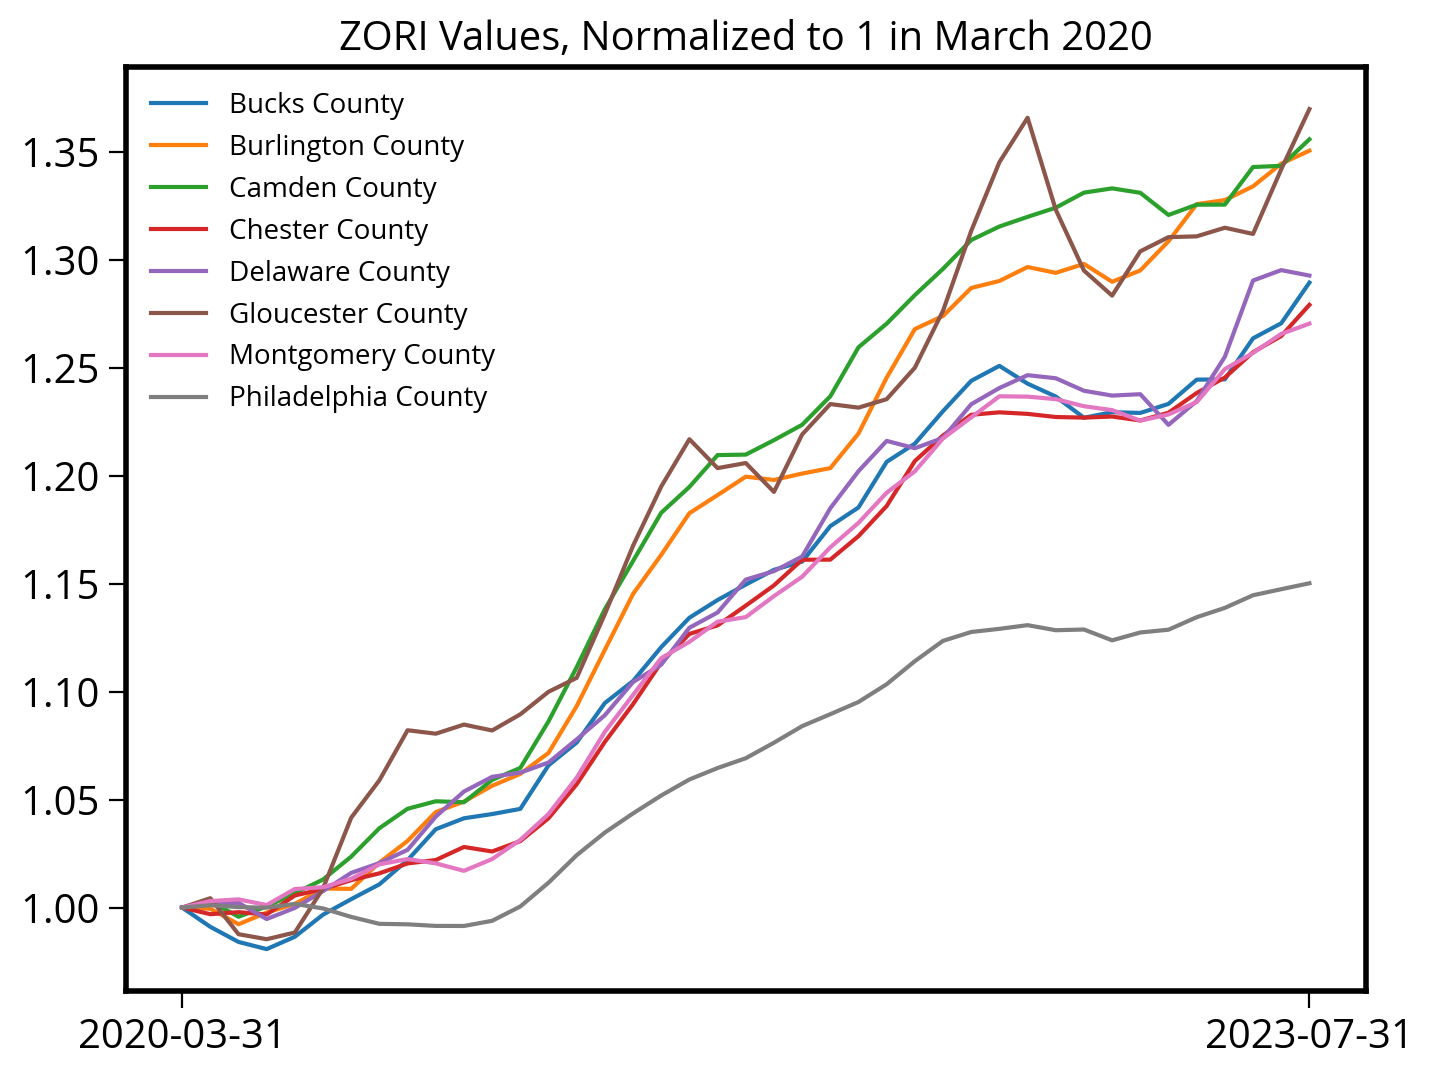

In [133]:
# Create the figure and axes
fig, ax = plt.subplots()

# Iterate over the data, grouped by county name
for countyName, group_df in prices_philly_metro.groupby("RegionName"):
    
    # Trim to where Date > March 2020
    # Sort by Date in ascending order
    group_df = group_df.sort_values("Date").query("Date >= '2020-03-01'")

    # Date vs. ZORI
    x = group_df["Date"]
    y = group_df["ZORI"]
    
    # Trime
    ax.plot(x, y / y.iloc[0], label=countyName)

# Format and add a legend
ax.set_title("ZORI Values, Normalized to 1 in March 2020")
ax.set_xticks(["2020-03-31", "2023-07-31"])
ax.legend(fontsize=10);

Plot the *ZHVI values*, normalized to 1 in March 2020:

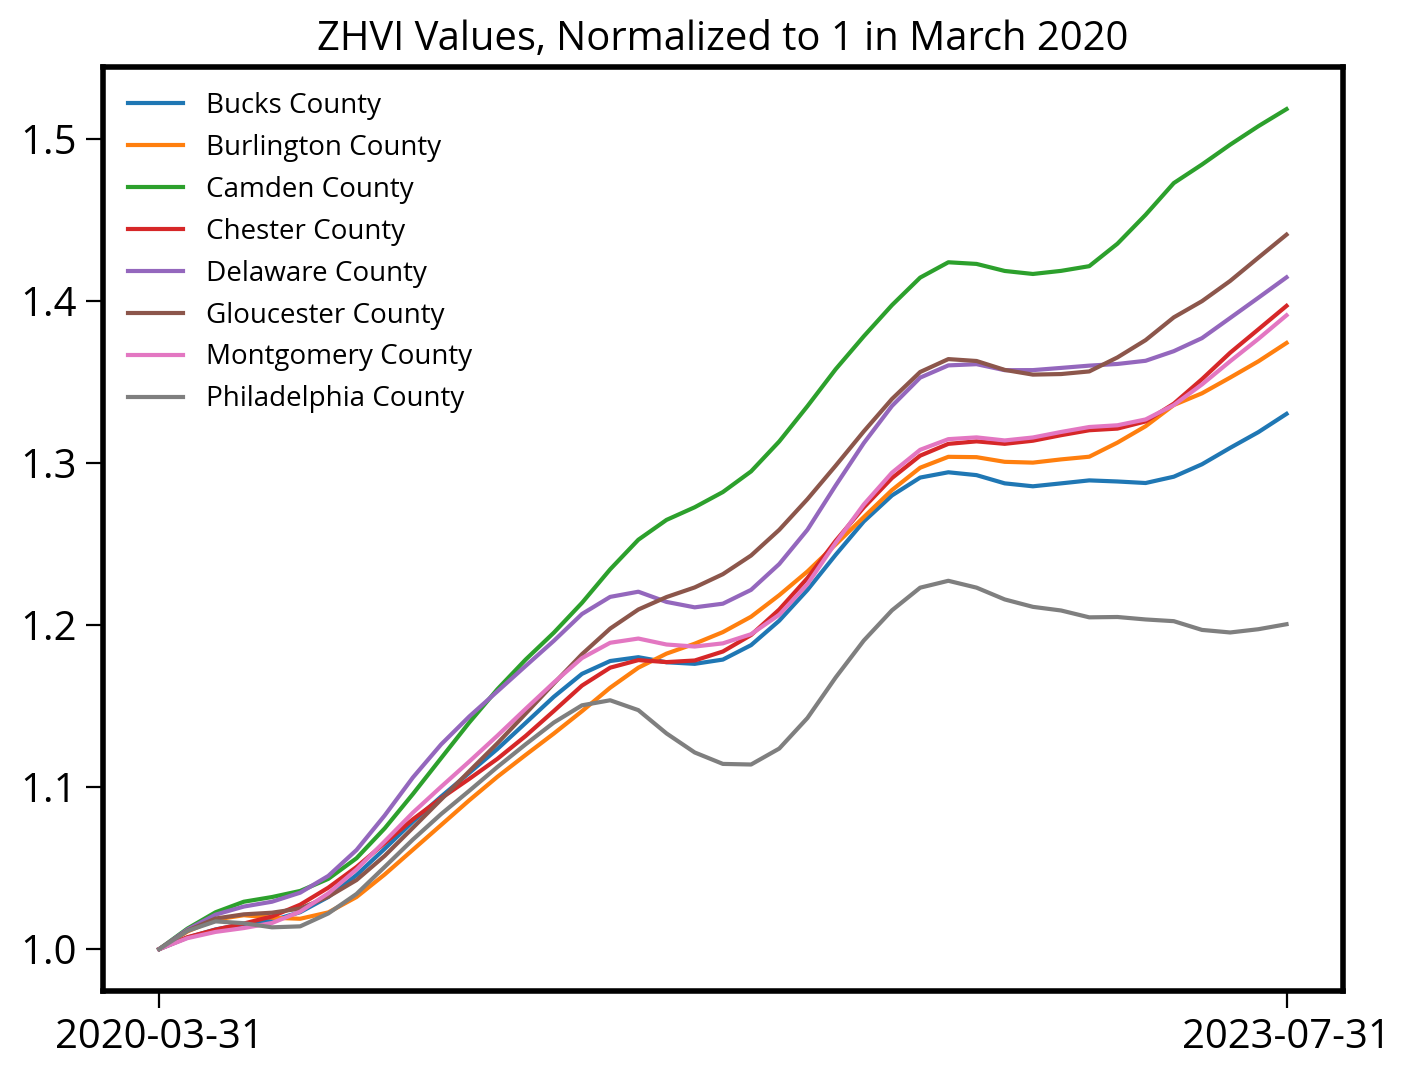

In [134]:
# Create the figure and axes
fig, ax = plt.subplots()

# Iterate over the data, grouped by county name
for countyName, group_df in prices_philly_metro.groupby("RegionName"):
    
    # Trim to where Date > March 2020
    # Sort by Date in ascending order
    group_df = group_df.sort_values("Date").query("Date >= '2020-03-01'")

    # Date vs. ZHVI
    x = group_df["Date"]
    y = group_df["ZHVI"]
    
    # Trime
    ax.plot(x, y / y.iloc[0], label=countyName)

# Format and add a legend
ax.set_title("ZHVI Values, Normalized to 1 in March 2020")
ax.set_xticks(["2020-03-31", "2023-07-31"])
ax.legend(fontsize=10);

**Takeaway:** You can clearly see that price growth in Philadelphia significantly lags the growth in its suburb counties.

## First Homework Assignment

Available on GitHub: 

[https://github.com/MUSA-550-Fall-2023/assignment-1](https://github.com/MUSA-550-Fall-2023/assignment-1)

Two parts: 

1. Download and install Python locally on your computer. Instructions in the assignment README!
1. Explore the "Donut Effect" using Zillow ZHVI data by ZIP code in Philadelphia, and submit your Jupyter notebook.


::: {.callout-important}
**Due date:** Wednesday 9/20 by the end of the day (11:59 PM)
:::

## That's it!

- Next week: Data Visualization Fundamentals
- Office hours:
    - Nick: 
    - Teresa:
    - Sign up for 15-minute time slots on Canvas (Zoom info in calendar invite)
- Post any questions on Ed Discussion!
- Email questions/concerns to nhand@design.upenn.edu